# 군집화 : CLUSTERING

- 목적
  - 데이터에 정답이 없다
  - **이 데이터가 무엇을 표방하는지 알 수 없다**
  - 이런 데이터를 알고리즘을 활용하여 무리(군집)를 만들어내어 새로운 특징점을 혹은 분류라는 지점을 생성하는 기법 

- 목표 
  - 분류 알고리즘에 이 데이터를 적용하기 위해 카테고리화 한 컬럼을 제공 => 전처리과정

# K-Mean(거리기반)

- 가장 일반적으로 많이 사용
- 원리
  - 군집의 **중심점**이라는 임시값을 선택해서, 해당 중심점을 기준으로 가까운 거리에 있는 데이터(포인트)들을 선택하는 기법

## 그림 설명
1. 최초 알고리즘 생성시, 군집 중심점을 총 몇개 만들지 결정(제시, 기본값활용, 추천받을 수도 있다), 아래 그림에서는 2개로 설정
2. 중심점 설정
  - **랜덤**, 운이 나쁘면 오랜 시간이 걸릴 수도 있다
  - 데이터가 많이 **밀집한 위치**에 평균적으로 중심점을 잡으면, 상대적으로 빠르게 최종 중심점을 찾을 수 있다
3. 중심점에 가까운 데이터 포인트들은 해당 중심점에 멤버로 소속된다 -> 거리계산
4. 군집을 중심으로 모든 멤버들간의 **평균 지점으로 중심점을 이동**시킨다
5. 반복(3~4번 절차 반복)
6. **중심점이 몇번까지 이동할 것인지 제약, 더 이상 중심점이 변경되지 않으면 군집화 종료된다**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


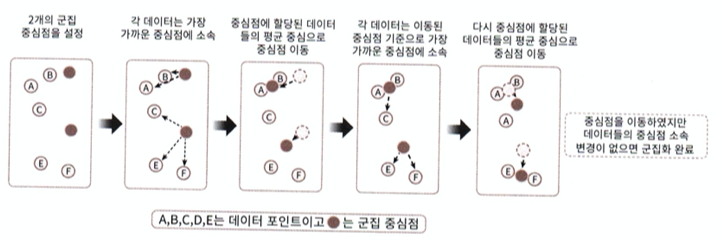

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/0406_res/k-mean_0.png')

- 장점
  - 매커니즘이 쉽다 -> 가장 많이 활용
  - 알고리즘도 심플
- 단점
  - 데이터가 많다면, 군집의 정확도가 떨어질 수 있다(평가를 통해 확인)
    - PCA등을 이용하여 압축처리가 필요
  - 3~4단계 지속적으로 발생되면 군집화 시간이 증가된다
  - 중심점을 몇개 잡을 지 애매하다
    - 후보군을 몇개 잡고 군집화 후 평가하여 결정

In [ ]:
# 필요한 라이브러리 가져오기
from sklearn.preprocessing import StandardScaler, scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
# 데이터 준비
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [ ]:
iris_df.shape

(150, 4)

In [ ]:
# 알고리즘 생성
'''
n_clusters : 군집의 갯수, 기본값 : 8, 군집 중심점의 개수
init       : 최초 중심점을 잡는 기법, 초기 중심점 선정하는 기술
  - "k-means++" : 1. 데이터 포인트 중에서 무작위로 1개 선택
                  2. 그 1개를 중심점으로 선정
                  3. 나머지는 그 중심점 기반으로 거리 계산
                  4. 나머지 포인트들 중 가장 멀리있는 포인트를 2번째 중심점으로 선정
                  5. 이 과정을 반복하여, 군집 중심점의 개수가 나올때 까지 반복
                  6. 초기 중심점 선정 완료
                    => 모든 군집 중심점들은 서로 가장 멀리 있게 된다
    - "random"    : 임의의 위치
  max_iter        : 기본값 300, 중심점을 선정하는 최대 횟수, 300번 이동(새로 선정)가능하다
                    그 전에 이동이 없다면 종료
'''

kmeans = KMeans( n_clusters=3, init="k-means++", max_iter=300, random_state=0 )
kmeans

KMeans(n_clusters=3, random_state=0)

In [ ]:
# 훈련을 통해 군집을 완성
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# 군집의 결과를 확인
# 0, 1, 2 등은 정답에 상관없이 나름 분류한 번호
kmeans.labels_, kmeans.labels_.shape

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32),
 (150,))

In [ ]:
iris.target
# 정답 대비하면 51번부터 150번까지 데이터에서 잡음(섞임)이 보인다
# 군집은 했지만 몇몇 데이터를 서로 잘못 군집 된 것이 보인다
# 결과를 알고 있어서 확인해 본 것임

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 학습시 사용한 데이터를 활용 -> 원래는 신규 데이터 사용
# 군집 모델의 예측은 그 결과가 답이 아니라, 군집화 한 결과이다(소속 군집 표현한 것)
kmeans.predict(iris_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# 군집 중심점 정보
kmeans.cluster_centers_, kmeans.cluster_centers_.shape

(array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]), (3, 4))

In [ ]:
# 새로운 컬럼 추가(target, cluster)
# 군집이 실제 정답과 잘 매칭되는지 확인
# 정답이 있는 경우만 해당
iris_df["target"] = iris.target
iris_df["cluster"] = kmeans.labels_
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1


In [ ]:
# unique값
iris_df["target"].unique(), iris_df["cluster"].unique()

(array([0, 1, 2]), array([1, 0, 2], dtype=int32))

In [ ]:
# 실제 분류값(target) 대비 군집(cluster) 카운트 표현 => 데이터프레임으로 표현
# target = 0, cluster = 1, 개수가 50
# groupby
# iris_df.groupby(["target","cluster"]).count()                   # 데이터프레임 타입
iris_df.groupby(["target","cluster"])[[iris_df.columns[0]]].count() # 시리즈 타입

# 0번 품종은 분류값이나 군집값마다 명확하게 잘 나눠짐
# 1, 2번 품종은 많이 겹쳐있다 -> 컬럼을 줄여서 진행(차원 축소)
# 차원축소: PCA, LDA, SVD, NMF...

sepal length (cm)
target cluster                   
0      1                       50
1      0                       48
       2                        2
2      0                       14
       2                       36

## 차원축소 사용(PCA)

- 차원축소가 효율적으로 작동하려면, 분류에 영향을 미치지 않은 중요하지 않은 컬럼들 제거 후 진행하는 것이 효율적
- 차원축소가 군집의 성능을 높이지는 않는다(보장하지 않는다)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# 4개의 컴포넌트(피쳐, 특성, 컬럼)을 2개로 압축(차원축소)한다
pca = PCA(n_components = 2)

In [ ]:
iris_pca = pca.fit_transform(iris.data)
iris_pca.shape

(150, 2)

In [ ]:
iris_pca[:2]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123]])

In [ ]:
iris_df.shape, iris_pca.shape

((150, 6), (150, 2))

In [ ]:
iris_pca[:, 0]

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978,
        1.28482569,  0.93248853,  1.46430232,  0.18331772,  1.08810326,
        0.64166908,  1.09506066, -0.74912267,  1.04413183, -0.0087454 ,
       -0.50784088,  0.51169856,  0.26497651,  0.98493451, -0.17392537,
        0.92786078,  0.66028376,  0.23610499,  0.94473373,  0.04

In [ ]:
# df에 추가
iris_df["pca_1"] = iris_pca[:, 0]
iris_df["pca_2"] = iris_pca[:, 1]
iris_df.head(2) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001


- pca_1 값을 x축, pca_2 값을 y축으로 산점도 만들기
- 데이터 분포를 보고 군집값 기반으로 그려봤을 때 잘 분류가 되었는지 확인

0
1
2


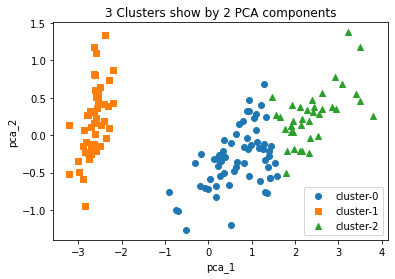

In [ ]:
markers = ['o', 's', '^']                       # 데이터 포인트의 모양
cluster_cnt = len(iris_df['cluster'].unique())  # 군집의 개수

for c_idx in range(cluster_cnt) :               # 군집의 개수만큼 반복
  print(c_idx)
  # 반복적으로 군집별 데이터 획득
  tmp = iris_df[iris_df['cluster'] == c_idx]    # 해당 군집데이터만 추출
  x = tmp['pca_1']                              # 해당 군집의 x좌표 
  y = tmp['pca_2']                              # 해당 군집의 y좌표 
  plt.scatter(x, y, marker = markers[c_idx], label = f'cluster-{c_idx}')    # 산점도 그리기
  
plt.legend()
plt.xlabel("pca_1")
plt.ylabel("pca_2")
plt.title("3 Clusters show by 2 PCA components")

plt.show()

# PCA 컬럼값 기반으로 군집을 살펴보면 잘 분류가 되어 있다
# 그러나, 실제 정답(제공 받았으므로)기반으로는 틀린 부분이(군집 0, 2) 존재한다
# 절대적으로 보지 말고, 컬럼을 검토해서(제거할것들은 평가를 통해서 처리) 진행할 필요가 있다

In [ ]:
# pca_1, pca_2 데이터로 군집해서 비교
kmeans2 = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, random_state = 0)

iris_df2 = iris_df.iloc[:, -2:]
iris_df2.head(2)

,pca_1,pca_2
0,-2.684126,0.319397
1,-2.714142,-0.177001


In [ ]:
kmeans2.fit(iris_df2)

KMeans(n_clusters=3, random_state=0)

In [ ]:
iris_df2['target'] = iris.target
iris_df2['cluster'] = kmeans2.labels_
iris_df2.head(2)

,pca_1,pca_2,target,cluster
0,-2.684126,0.319397,0,0
1,-2.714142,-0.177001,0,0


In [ ]:
iris_df2.groupby(['target','cluster'])['pca_1'].count()
# pca 사용해서 얻는 이점이 없다
# 컬럼을 좀 더 걸러야 될 것 같다

target  cluster
0       0          50
1       1           3
        2          47
2       1          36
        2          14
Name: pca_1, dtype: int64

## 군집평가

- 실제 비지도 학습의 대상이 되는 데이터는 정답이 없다
  - 실제 정답과 비교를 할 수 없다(실제로는)
  - 군집이 잘 되었는지 평가방식이 필요하다
    - 몇개로 군집해야 잘 분류가 되는가?
    - 지표
      - **실루엣 계수**


### 실루엣 분석

- 군집간의 거리가 효율적인가를 판단
  - 평가기준
    - 군집의 포인트들은 잘 뭉쳐져 있는가?
    - 군집들 간의 거리는 잘 떨어져 있는가?
  - 군집이 잘 되었다면
    - 군집내에 비슷한 여유공간이 형성되어 있다
    - 균형
- 방법
  - 실루엣 계수
    - **개별 데이터가 가지는 군집화 지표**
    - 개별 데이터 포인트도 실루엣 계수값이 존재
    - 군집별로 값을 가진다
    - 데이터를 대변하는 별도의 값을 가진다      

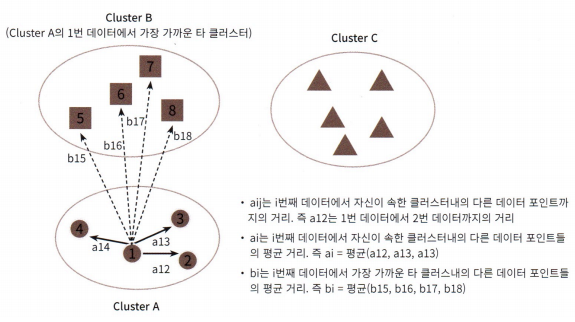

In [ ]:
Image('/content/drive/MyDrive/0406_res/cluster_실루엣_1.png')

- 그림해석
  - 현재 군집은 총 3개이다
  - Cluster A를 기준으로 살펴본다
  - 1, 2, 3, 4 포인트 존재함
  - 1번 포인트 => a1
    - 1번 포인트 기준으로 같은 군집 내에 있는 다른 포인트 간의 거리 => a12, a13, a14, ...
    - 2번, 3번, 4번 포인트도 각각 가지고 있다
    - ai => a12 + a13 + a14 / 총 갯수 => 평균 값
  - Cluster B를 같이 검토
    - 5, 6, 7, 8포인트 존재
    - Cluster A의 1번 포인트 기준, 다른 군집내에 있는 포인트(5, 6, 7, 8)간의 거리 => b15, b16, b17, b18, ...
    - bi => b15 + b16 + b17 + b18/ 총 갯수 => 평균 값 

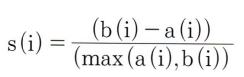

In [ ]:
Image('/content/drive/MyDrive/0406_res/cluster_실루엣_2.png')

- i    : 특정 데이터 포인트
- s(i) : 륵정 데이터 포인트의 실루엣 계수
- a(i) : 같은 군집내에서 있는 데이터 포인트 간의 평균 거리
- b(i) : 같은 군집내에서 다른 군집에 있는 데이터 포인트 간의 평균거리
- b(i) - a(i) = 특정 데이터 포인트 기준, 군집 사이의 거리
- b(i) - a(i)/ (max(a(i),b(i)) : 군집사이의 거리 / 거리값들의 최대치



### 실루엣 계수를 이용한 평가

  - -1 ~ 0 ~ 1 값이 나온다
    - 1에 가까울수록 두개의 군집화가 잘 되었다
    - 0에 가까울수록 재작업의 필요성이 보인다
    - -1에 가까울수록 다시 작업해야 한다

- **데이터 전체에 대한 군집화의 실루엣 계수값은 1에 가깝게 가도록 하는 게 목표**
- **전체 실루엣 계수 평균값과 개별 군집의 평균값 차이가 적을수록 좋다라고 판단(편차가 적을수록)**

### 시각화

In [ ]:
from sklearn.metrics import silhouette_score , silhouette_samples

In [ ]:
# 데이터 가져오기
iris_df = iris_df.iloc[ : , : 4]
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
kmeans = KMeans( n_clusters=3, init="k-means++", max_iter=300, random_state=0 )
kmeans.fit( iris_df )

KMeans(n_clusters=3, random_state=0)

In [ ]:
iris_df['cluster'] = kmeans.labels_
iris_df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1


In [ ]:
# 각각 데이터 포인트들의 실루엣 계수 계산
data_per_silhouettes = silhouette_samples(iris.data, iris_df['cluster'])
data_per_silhouettes.shape

(150,)

In [ ]:
data_per_silhouettes[:5], data_per_silhouettes[-5 :]
# setosa같은 종은 실루엣계수 값이 1에 가깝고 기타 종은 0에 더 가까운 값을 가지고 있다

(array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ]),
 array([0.42513648, 0.10417086, 0.31493016, 0.35245379, 0.18544229]))

In [ ]:
# 실리콘계수의 평균점수(cluster)
avg_sil_score = silhouette_score(iris.data, iris_df['cluster'])
avg_sil_score
# 현재 평균 점수는 0.55 레벨이어서 1에 가깝도록 군집화 하기

0.5528190123564095

In [ ]:
# silhouette_sample 컬럼 추가 = 데이터 별 실루엣 계수
iris_df["silhouette_sample"] = data_per_silhouettes
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette_sample
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495


In [ ]:
# 개별 데이터 150개의 군집별 실루엣 계수의 평균값은
iris_df.groupby('cluster')['silhouette_sample'].mean()
# 1번 군집은 비교적 잘 분류됨, 나머지는 중간이하 수준이라서 군집의 변화가 필요

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_sample, dtype: float64

- 군집 개수를 2, 3, 4, 5 등 여러 후보군을 넣어서 평가
- 새로운 더미데이터를 생성(make_xxx)


In [ ]:
# 군집용 더미 데이터 생성하는 라이브러리
from sklearn.datasets import make_blobs

In [ ]:
'''
n_samples=100 : 생성할 샘플 수(데이터 포인트 수)
n_features=2, : 특성 수
centers=None, : 군집 중심점의 수, 군집의 개수
cluster_std=1 : 군집의 표준편차
'''
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4, random_state = 0)
X.shape, y.shape

((500, 2), (500,))

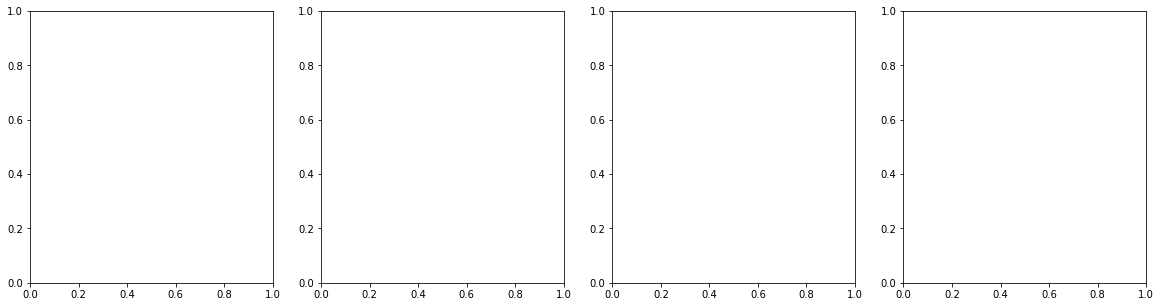

In [ ]:
def show_silhouette_per_cluster(candidate_clusters, X) :
  # 시각화 도구 => 가로 한줄에 군집 후보 개수만큼 시뮬레이션되어 시각화
  #                한 줄에 차트가 4개 등장
  ncols = len(candidate_clusters)
  plt.subplots(nrows = 1, ncols = ncols, figsize =(5*ncols,5))

  plt.show()
  pass
# 군집 중심점의 후보 목록
candidate_clusters = [2, 3, 4, 5]
# 군집 평가 시각화 함수
show_silhouette_per_cluster(candidate_clusters, X)

0 0.4579416175733296
1 0.46541359707472485
2 0.5010253066728394
3 0.45137015655658913


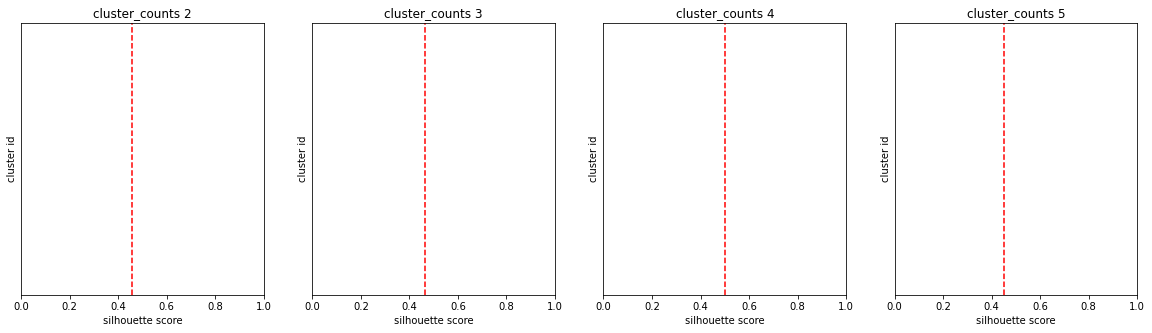

In [ ]:
from IPython.core.pylabtools import figsize

# 군집화 -> 데이터에 정답이 없다, 여기 코드에서 y를 사용하지 않고 있다
def show_silhouette_per_cluster( candiate_clusters, X ):  
  ncols  = len( candiate_clusters )
  _, axs = plt.subplots( nrows=1, ncols=ncols, figsize=(5*ncols,5) )

  for idx, center_cnt in enumerate( candiate_clusters ):
    #print( f'인덱스 {idx}, 중심점개수 {center_cnt}')
    # 1. 군집화 알고리즘 생성
    cluster_model = KMeans( n_clusters=center_cnt, max_iter=500, random_state=0 )
    # 2. 데이터를 넣어서 학습, 필요하면 예측
    cluster_pred  = cluster_model.fit_predict( X )
    # 3. 실루엣 계수 계산 데이터 포인트별 -> X축이 계수값     
    #    -> 0 ~ 1 만 사용, 음수대 영역을 dp용(군집번호 표시용)으로 일부 사용
    sil_vaules    =  silhouette_samples( X, cluster_pred )
    # 4. 실루엣 계수 평균값 계산 (군집이 적절한지 판단하는 잣대)
    sil_avg       = silhouette_score( X, cluster_pred )
    print( idx, sil_avg )

    # 5. 드로잉시 -> 군집 0번부터 번호가 올라갈수록 Y축 값을 증가시킬것이다
    #    바닥에는 군집 0, 그 위에 군집 1,... 올라가도록 조정(단순히 위치값으로만 사용)
    #    군집화된 데이터를 그린다 -> 실루엣 계수값을 그린다. 정렬해서 
    for i in range( center_cnt ):
      # 군집 드로잉
      pass
    
    # 데코
    axs[ idx ].set_title(f'cluster_counts {center_cnt}')
    axs[ idx ].set_xlabel( 'silhouette score' )
    axs[ idx ].set_ylabel( 'cluster id' )
    # y축의 좌표계는 제거 -> 구분용이므로
    axs[ idx ].set_yticks( [] )
    # 0과 1을 정수로 넣었지만 중간값이 float라서 미적용
    axs[ idx ].set_xticks( [0, 0.2, 0.4, 0.6, 0.8, 1] )

    # 6. 실루엣 계수 평균값을 수직으로, 빨강색 점선으로 그리겟다
    axs[ idx ].axvline( x=sil_avg, color='red', linestyle='--'  )
    pass

  

  plt.show()
  pass

candiate_clusters = [ 2, 3, 4, 5 ]
show_silhouette_per_cluster( candiate_clusters, X )

In [ ]:
# 주석 제거

In [ ]:
import matplotlib.cm as cm

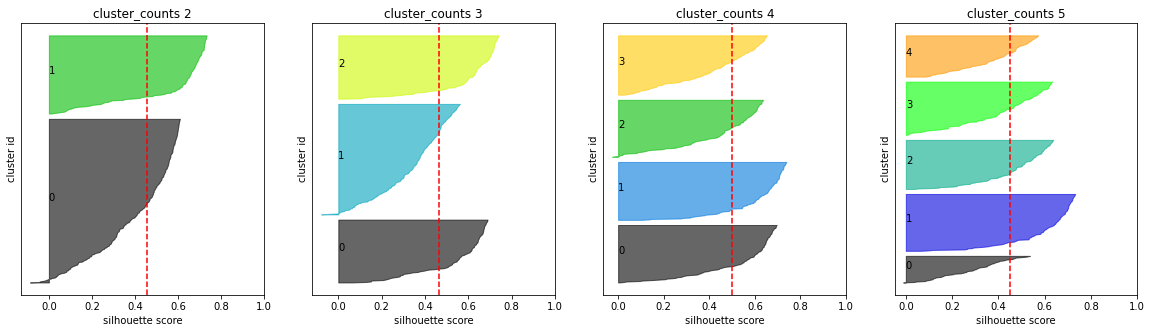

In [ ]:
def show_silhouette_per_cluster( candiate_clusters, X ):  
  ncols  = len( candiate_clusters )
  _, axs = plt.subplots( nrows=1, ncols=ncols, figsize=(5*ncols,5) )
  for idx, center_cnt in enumerate( candiate_clusters ):
    cluster_model = KMeans( n_clusters=center_cnt, max_iter=500, random_state=0 )
    cluster_pred  = cluster_model.fit_predict( X )
    sil_vaules    = silhouette_samples( X, cluster_pred )        
    sil_avg       = silhouette_score( X, cluster_pred )
    
    # 군집을 그릴때 y축의 시작위치 -> 군집이 변경되면 갱신
    y_std_lower   = 0
    for i in range( center_cnt ):
      # 군집 드로잉
      # 1. 군집 번호와 일치하는 실루엣 계수값 추출
      tmp = sil_vaules[ cluster_pred == i ]
      tmp.sort()
      
      # 2. 해당 군집에 포함된 실루엣 계수값들은 그린다
      y     = np.arange( y_std_lower, y_std_lower+tmp.shape[0] )
      x1    = 0    # 0부터 그린다
      x2    = tmp  # 개별 데이터 포인트의 실루엣 계수값 까지
      color = cm.nipy_spectral( i/center_cnt )  # 군집별로 다른색을 지정한다 0 ~ 1 사이 값으로 안겹치게
      axs[ idx ].fill_betweenx( y, x1, x2, alpha=0.6, edgecolor=color, facecolor=color )

      # 3. 해당 군집의 번호를 그린다
      axs[ idx ].text( 0 , y_std_lower + tmp.shape[0]/2, str(i) )

      # 4. 군집 드로잉 y축 시작 위치 변경
      #    새로운 위치 = 최초위치 + 현재 군집의 총개수 + 여백(=10, 설정)
      y_std_lower = y_std_lower + tmp.shape[0] + 10
      pass
    axs[ idx ].set_title(f'cluster_counts {center_cnt}')
    axs[ idx ].set_xlabel( 'silhouette score' )
    axs[ idx ].set_ylabel( 'cluster id' )
    axs[ idx ].set_yticks( [] )
    axs[ idx ].set_xticks( [0, 0.2, 0.4, 0.6, 0.8, 1] )
    axs[ idx ].axvline( x=sil_avg, color='red', linestyle='--'  )
  plt.show()

candiate_clusters = [ 2, 3, 4, 5 ]
show_silhouette_per_cluster( candiate_clusters, X )

# 군집 평가 결과 군집 중심점이 4개인 클러스터가 이 데이터에 가장 적합한 군집결과이다

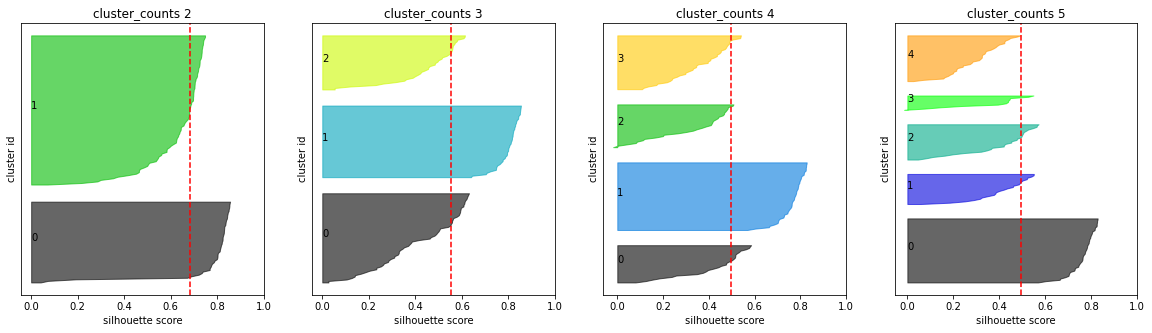

In [ ]:
candiate_clusters = [ 2, 3, 4, 5 ]
show_silhouette_per_cluster( candiate_clusters, load_iris().data )
# 데이터를 교체해서 시뮬레이션 수행 => 적절한 군집 계수를 파악할 수 있다 

# Mean_Shift(밀도기반)

- 특정 대역폭(bandwidth)을 이용하여 최조의 확률 밀도 중심이 높은 쪽으로 중심점을 이동하는 방식

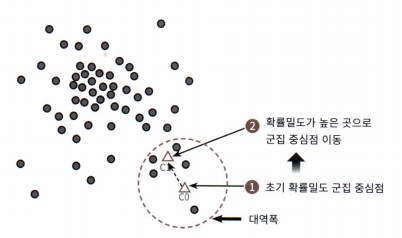

In [ ]:
Image('/content/drive/MyDrive/0406_res/cluster_meanshfit_1.png')
# 1. 데이터 포인트들의 분포도를 이용하여, 군집 중심점을 생성
#    확률 밀도 함수(KDE: Kernel Density Estimation)를 활용

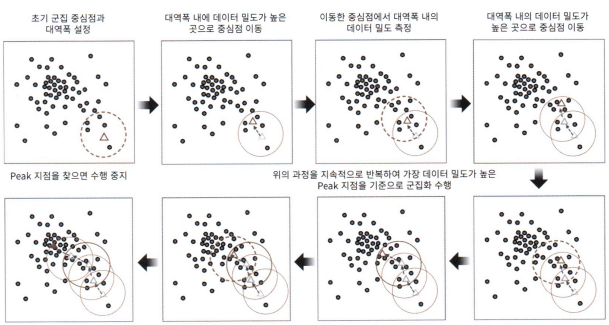

In [ ]:
Image('/content/drive/MyDrive/0406_res/cluster_meanshfit_2.png')
# 군집 중심점을 찾는 과정이 밀도를 기반으로 찾는다
# 가장 높은 밀도 를 가진 지점으로 이동할때까지 반복
# 품질: 대역폭의 크기, 이동 반복횟수
# 장점: 군집을 몇 개로 할 것인지 정할 필요없다 => 대역폭을 통해서 결정된다 

In [ ]:
# 더미 데이터
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
X.shape, y.shape                  

((200, 2), (200,))

In [ ]:
# 알고리즘 생성
from sklearn.cluster import MeanShift
'''
 - bandswift : 대역폭
 - max_iter  : 중심점 이동 최대횟수
'''
meanshift = MeanShift(bandwidth = 0.9)

In [ ]:
# 훈련, 예측->군집결과를 리턴
cluster_labels = meanshift.fit_predict( X )
cluster_labels, np.unique( cluster_labels )
# 군집은 자동으로 시뮬레이션 결과 8개로 생성되었다

(array([5, 0, 0, 1, 4, 1, 2, 6, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 6, 3, 1, 2,
        0, 0, 3, 5, 7, 1, 5, 1, 6, 4, 1, 0, 2, 2, 0, 2, 7, 3, 2, 1, 3, 5,
        4, 4, 0, 1, 0, 0, 0, 2, 1, 5, 5, 1, 2, 2, 0, 4, 1, 5, 0, 2, 2, 1,
        2, 6, 1, 6, 7, 0, 0, 1, 5, 1, 2, 2, 2, 3, 1, 0, 0, 2, 2, 0, 0, 1,
        0, 2, 3, 1, 7, 0, 2, 0, 0, 1, 1, 2, 2, 4, 1, 0, 5, 5, 2, 0, 5, 6,
        0, 1, 2, 5, 0, 0, 6, 2, 1, 1, 2, 2, 1, 0, 2, 0, 3, 2, 1, 4, 1, 6,
        2, 2, 0, 2, 2, 0, 2, 1, 5, 1, 4, 2, 2, 0, 3, 3, 2, 0, 2, 3, 5, 1,
        0, 2, 2, 2, 0, 0, 6, 1, 1, 1, 0, 5, 2, 1, 2, 2, 6, 7, 5, 2, 1, 1,
        6, 3, 0, 6, 0, 1, 2, 2, 7, 6, 1, 2, 4, 4, 1, 1, 6, 2, 6, 2, 5, 2,
        0, 2]), array([0, 1, 2, 3, 4, 5, 6, 7]))

In [ ]:
# 대역폭을 올리면 군집의 수가 줄어드는가?
meanshift      = MeanShift( bandwidth=(0.9+0.1) )
cluster_labels = meanshift.fit_predict( X )
cluster_labels, np.unique( cluster_labels )
# 대역폭을 대략 10% 정도 증가시킨후, 시뮬레이션 결과, 군집의 개수가 1/3로 줄어들었다
# 최적화 포인트는 대역폭 조정과 이동 횟수이다

(array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
        0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
        2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
        0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2,
        0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
        2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
        0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
        0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
        0, 2]), array([0, 1, 2]))

- 최적의 대역폭은?
  - 최적의 대역폭을 찾아라


In [ ]:
from sklearn.cluster import estimate_bandwidth

In [ ]:
'''
  - quantile :  전체 데이터가 100개가 있다. 만약 값이 0.3이면 30% 분량 
                => 30% 만 가지고 특정 알고리즘을 활용하여 클러스터링을 진행,
                이를 통해 최적의 대역폭을 찾는다
                특정 알고리즘 => KNN 기본값 0.2
'''
bandwidth = estimate_bandwidth(X, quantile=0.2)
bandwidth

1.443521103865421

In [ ]:
meanshift      = MeanShift( bandwidth=bandwidth )
cluster_labels = meanshift.fit_predict( X )
cluster_labels, np.unique( cluster_labels )

(array([1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 3, 1, 1, 0,
        2, 2, 1, 3, 0, 1, 3, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 3,
        2, 2, 2, 1, 2, 2, 2, 0, 1, 3, 1, 1, 0, 0, 2, 2, 1, 3, 2, 0, 0, 1,
        0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1,
        2, 0, 1, 1, 0, 3, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 3, 0, 2, 3, 0,
        3, 1, 0, 3, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 1, 2, 1, 0,
        0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1,
        2, 0, 0, 0, 2, 2, 3, 1, 1, 1, 2, 2, 0, 3, 0, 0, 3, 0, 2, 0, 1, 1,
        2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 1, 0,
        2, 0]), array([0, 1, 2, 3]))

In [ ]:
meanshift.cluster_centers_

array([[ 1.82056298,  0.76901053],
       [-1.65887009,  2.7799957 ],
       [ 0.90876037,  4.44560153],
       [-0.39007101,  3.69917003]])

In [ ]:
# X => df로 구성
cluster_df = pd.DataFrame(data = X, columns = ['c1','c2'])
cluster_df["target"] = y
cluster_df["cluster"] = cluster_labels
cluster_df.head(2)

,c1,c2,target,cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,2


0
1
2
3


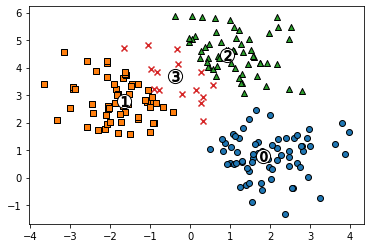

In [ ]:
# 데이터 포인트를 군집기반으로 그리고, 각 군집의 센터(중심점)에 군집 중심점 표기하시오
markers = ['o','s','^','x','*']
for c_label in np.unique(cluster_labels):
  print(c_label)
  # 1. 특정 군집에 해당된는 데이터를 추출하시오
  tmp = cluster_df[c_label == cluster_df.cluster]
  # 2. 분포도 그리기
  plt.scatter(tmp.c1, tmp.c2, edgecolors='k', marker=markers[c_label])
  # 3. 중심점
  center_x, center_y = meanshift.cluster_centers_[ c_label ]
  # 4. 배경
  plt.scatter(center_x, center_y, s = 200, color = 'white', edgecolors='k')
  # 5. 글자
  plt.scatter(center_x, center_y, s=100, color='k' , edgecolors='k', marker=f'${c_label}$')

plt.show()

In [ ]:
# 실제 정답과 비교
cluster_df.groupby('target')['cluster'].value_counts()

target  cluster
0       2          59
        3           8
1       0          67
2       1          58
        3           8
Name: cluster, dtype: int64

- 장점
  - 군집화가 유연하게 구성된다
  - 군집개수를 미리 정할 필요 없다
  - 이상치 데이터가 군집에 영향을 미치지 않는다
- 단점
  - 데이터가 많으면 많을수록 시간이 많이 소요된다
  - 대역폭에 따른 성능차이가 크다

- 사용처
  - 이미지, 영상쪽에 많이 활용된다

# GMM(확률기반)

# DBSCAN(밀도기반, 기하학적분포)